# 데이터 시각화 종합 연습문제


## 01.데이터 분포 | 문제1
kings_life 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다.수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.


#### 패키지 참조

In [53]:
from hossam import load_data                 #글꼴을 시스템에 등록
from matplotlib import font_manager as fm    #캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from pandas import melt,pivot_table
from pandas import DataFrame
import datetime as dt

그래프 초기화

In [3]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 데이터 로드

In [4]:
kings_life = load_data('kings_life')
kings_life.head()

[data] https://data.hossam.kr/data/lab06/kings_life.xlsx
[desc] 조선시대 역대 왕의 수명을 조사한 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38


### 1) 수명에 대한 기술통계량

In [5]:

kings_life.describe().T

,count,mean,std,min,25%,50%,75%,max
수명,27.0,46.037037,16.173296,16.0,33.0,45.0,56.0,82.0


### 2) 상자그림

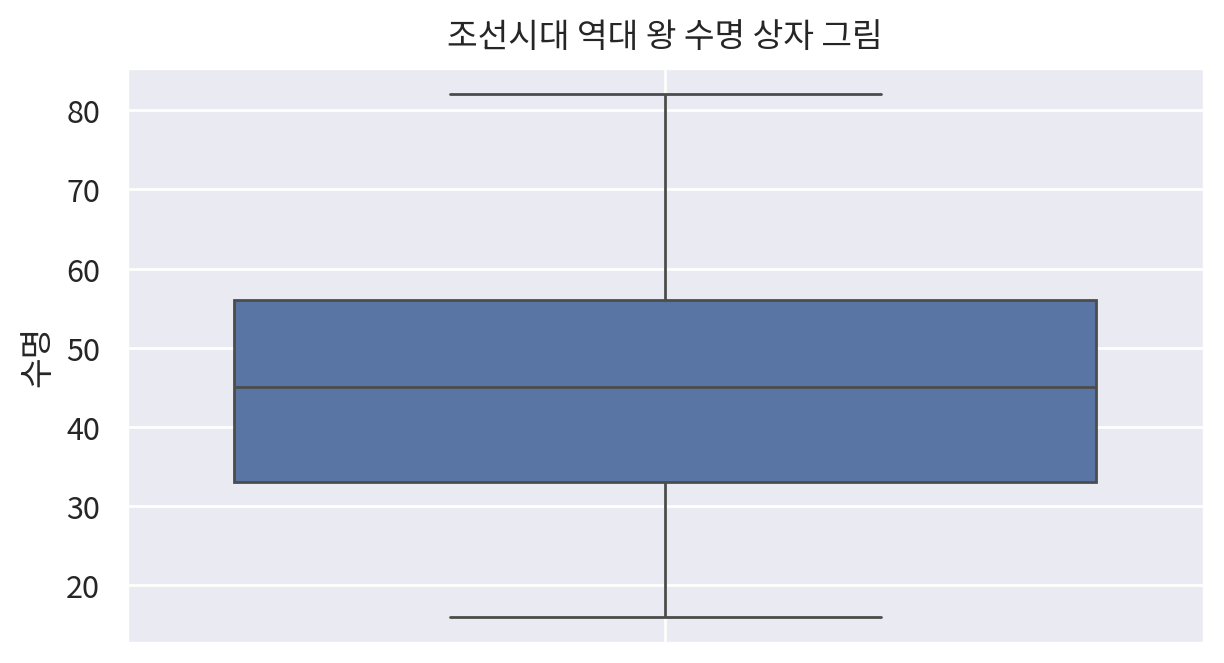

In [6]:
# 1) 그래프 초기화
my_dpi=200
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=kings_life,y='수명')

# 3) 그래프 꾸미기
ax.set_title("조선시대 역대 왕 수명 상자 그림", fontsize=12, pad=8)
ax.grid(True)                 # 배경 격자 표시

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


### 알 수 있었던 사실
- 평균값 46과 중앙값 45가 비슷하여, 평균을 기준으로 대칭을 이루는 정규분포의 형태로 나이가 분포되어 있음을 알 수 있었다
>  그림 상자를 보았을 때 이상치가 존재하지 않아 평균에 영향을 주는 요인이 줄어들었던 것으로 보인다

## 01.데이터 분포 | 문제2
stock 데이터셋은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터의 일부이다.
외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

### 데이터 로드

In [7]:
stock = load_data('stock')
stock.head()

[data] https://data.hossam.kr/data/lab06/stock.xlsx
[desc] 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135


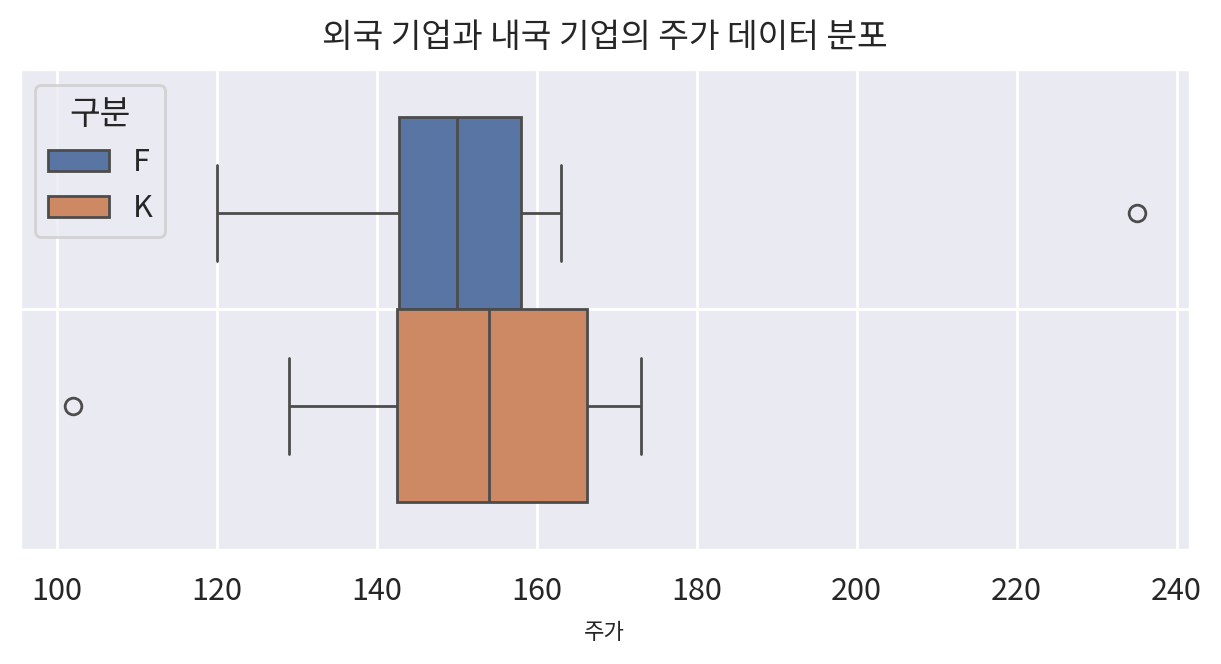

In [8]:
# 외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라.
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=stock, x='주가', hue='구분')

# 3) 그래프 꾸미기
ax.set_title("외국 기업과 내국 기업의 주가 데이터 분포", fontsize=12, pad=8)
ax.set_xlabel("주가", fontsize=8, labelpad=5)
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


### 알 수 있었던 사실
- 금융사 중 내국 기업(K) 의 주가의 중앙값이 외국기업 (F) 보다 높으며 전반적으로 내국 기업의 주가가 더 높음을 확인했다
- 외국 기업의 경우 주가의 범위가 좌측 꼬리가 더 길어 낮은 주가의 회사가 내국 기업보다 더 많음을 확인했다

## 01.데이터 분포 | 문제3
grape 데이터셋은 포도농장에서 수집한 비료 종류에 따른 수확량 자료이다.
비료 종류별로 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는사실을 하나 이상 제시하라.

In [9]:
grape = load_data('grape')
grape.head()

[data] https://data.hossam.kr/data/lab06/grape.xlsx
[desc] 포도농장에서 수집한 비료 종류에 따른 수확량 자료 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8


In [10]:
# 비료 종류별로 기술통계량을 구하고 상자그림을 그려라.
category = sorted(list(grape['비료종류'].unique()))
category

['A', 'B']

In [11]:
grape.query('비료종류 == "A"').describe().T

,count,mean,std,min,25%,50%,75%,max
수확량,7.0,26.357143,6.578211,17.9,23.95,24.3,27.55,39.3


In [12]:
grape.query('비료종류 == "B"').describe().T

,count,mean,std,min,25%,50%,75%,max
수확량,4.0,18.7,6.17252,11.4,15.225,18.8,22.275,25.8


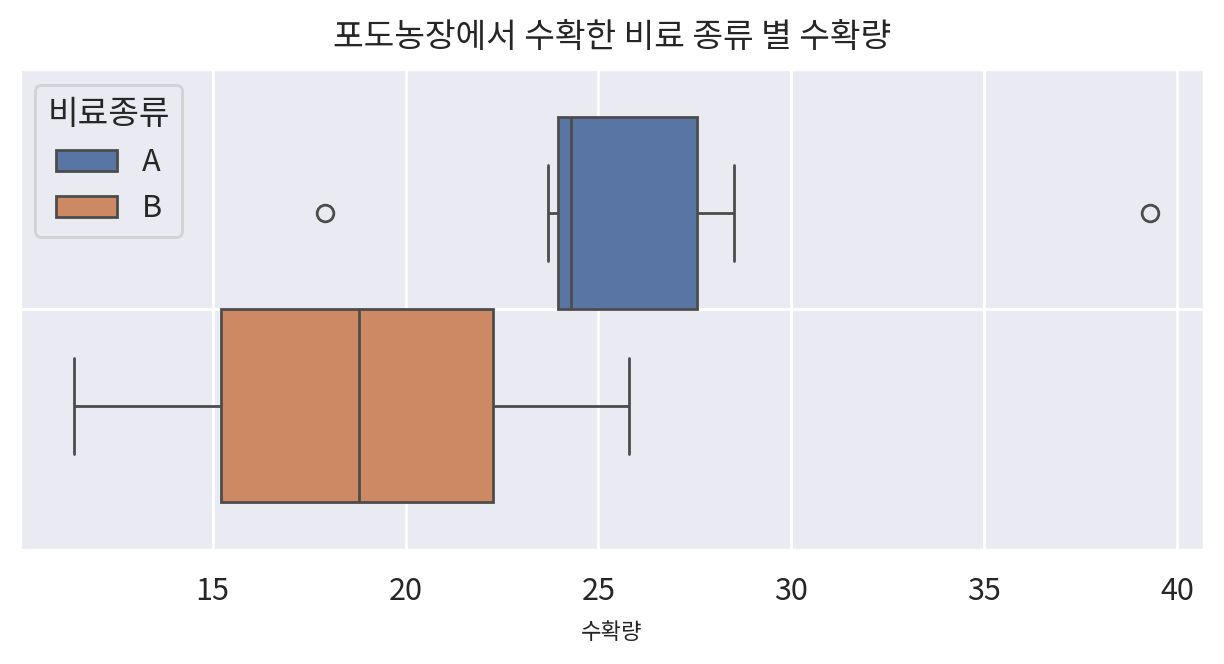

In [13]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=grape, x='수확량', hue='비료종류')

# 3) 그래프 꾸미기
ax.set_title("포도농장에서 수확한 비료 종류 별 수확량", fontsize=12, pad=8)
ax.set_xlabel("수확량", fontsize=8, labelpad=5)
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


#### 알 수 있었던 사실
- 비료 사용에 따른 수확량은 전체적으로 B 보다 A 의 경우가 더 높았다
- 비료 B 의 경우, 수확량의 평균과 중앙값이 모두 18로 비슷한 수준을 보이면서 수확량이 정규 분포를 따르는 것으로 확인되었다.
- 비료 A 의 경우 이상치가 확인되었고 , 이로 인해 평균값 (26) 이 영향을 받아 중앙값 (24) 와는 소폭 차이가 있는 것으로 확인되었다


## 01.데이터 분포 | 문제4
analysis_grade 데이터셋은 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.


In [14]:
analysis_grade = load_data('analysis_grade')
analysis_grade.head()

[data] https://data.hossam.kr/data/lab06/analysis_grade.xlsx
[desc] 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67


In [15]:
#학과 A 에 대한 기술통계량
analysis_grade.query('학과 == "A"').describe().T

,count,mean,std,min,25%,50%,75%,max
점수,20.0,43.75,20.229928,10.0,29.5,42.5,55.0,78.0


In [16]:
#학과 C 에 대한 기술통계량
analysis_grade.query('학과 == "C"').describe().T

,count,mean,std,min,25%,50%,75%,max
점수,12.0,56.166667,14.68972,41.0,50.25,52.5,54.25,90.0


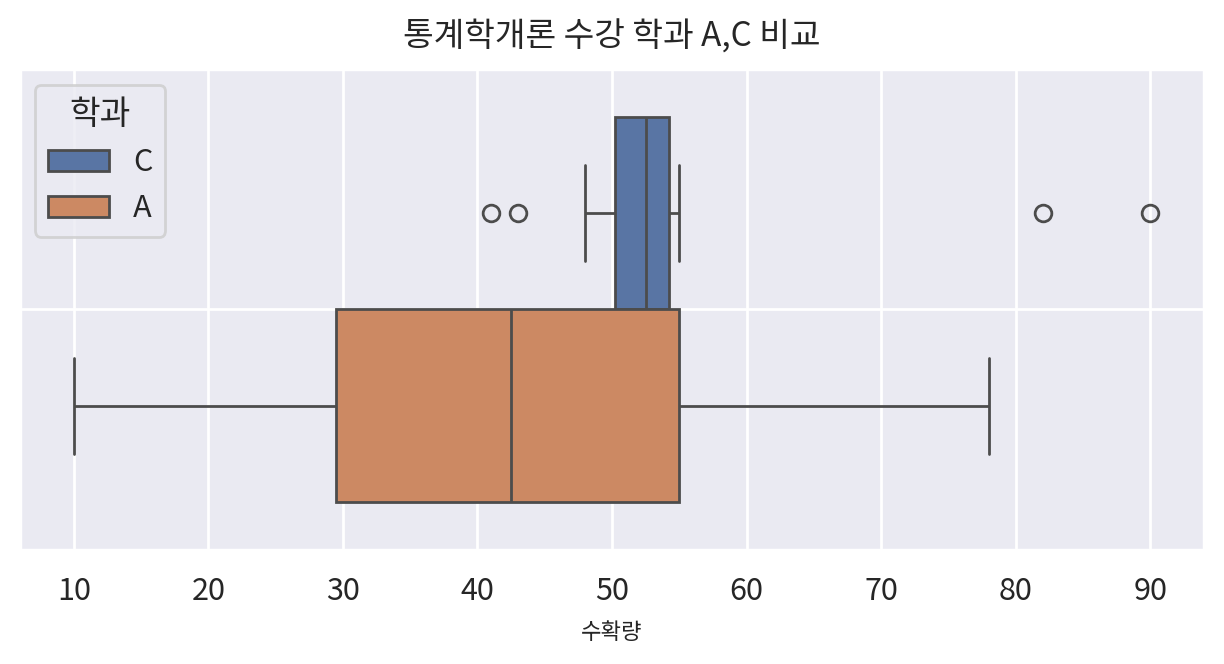

In [17]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=analysis_grade, x='점수', hue='학과')

# 3) 그래프 꾸미기

ax.set_title("통계학개론 수강 학과 A,C 비교", fontsize=12, pad=8)
ax.set_xlabel("수확량", fontsize=8, labelpad=5)
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


#### 알 수 있었던 사실
- 학과 C 의 통계학개론 점수 평균 및 중앙값이 A 보다 더 높다
- 학과 A 의 점수가 더 넓게 분포하고 있다 (표준 편차 A>C )
- 학과 C 에는 소수의 고득점자가 존재한다 (이상치)

## 01.데이터 분포 | 문제5

- stat_comp_grade 데이터셋은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

1. 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

2. 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

3. 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실 을 하나 이상 제시하라.

4. 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.


In [18]:
stat_comp_grade = load_data('stat_comp_grade')
stat_comp_grade.head()

[data] https://data.hossam.kr/data/lab06/stat_comp_grade.xlsx
[desc] 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78


#### 5-1. 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

In [19]:

stat_comp_grade_copy = stat_comp_grade.copy()

stat_comp_grade_copy['전공_LABEL'] = np.where (stat_comp_grade_copy['전공']=='STAT','1','2')

stat_comp_grade_copy.head()

,전공,중간고사,기말고사,전공_LABEL
0,STAT,34,86,1
1,STAT,50,77,1
2,STAT,75,74,1
3,COMP,76,96,2
4,COMP,61,78,2


#### 5-2. 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [20]:

#중간고사 기술통계량
중간고사_기술통계_시리즈=stat_comp_grade_copy['중간고사'].describe()
중간고사_기술통계_df=DataFrame(중간고사_기술통계_시리즈)
중간고사_기술통계_df.T


,count,mean,std,min,25%,50%,75%,max
중간고사,20.0,65.15,19.647619,31.0,48.5,67.5,78.5,94.0


In [21]:
#기말고사 기술통계량
기말고사_기술통계_시리즈=stat_comp_grade_copy['기말고사'].describe()
기말고사_기술통계_df=DataFrame(기말고사_기술통계_시리즈)
기말고사_기술통계_df.T

,count,mean,std,min,25%,50%,75%,max
기말고사,20.0,75.65,15.597824,40.0,66.0,79.0,85.25,96.0


#### 기술통계량을 기반으로 알 수 있는 점
- 중간고사 점수의 분포가 더 넓게 형성되어 있다 (표준편차가 더 큼)
- 중간고사와 기말고사 모두 평균이 중앙값보다 낮다, 이상치 중 유독 낮은 점수의 학생들이 중간고사와 기말고사 모두에 존재하는 것이 확인 되었다

#### 5-3. 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실 을 하나 이상 제시하라.

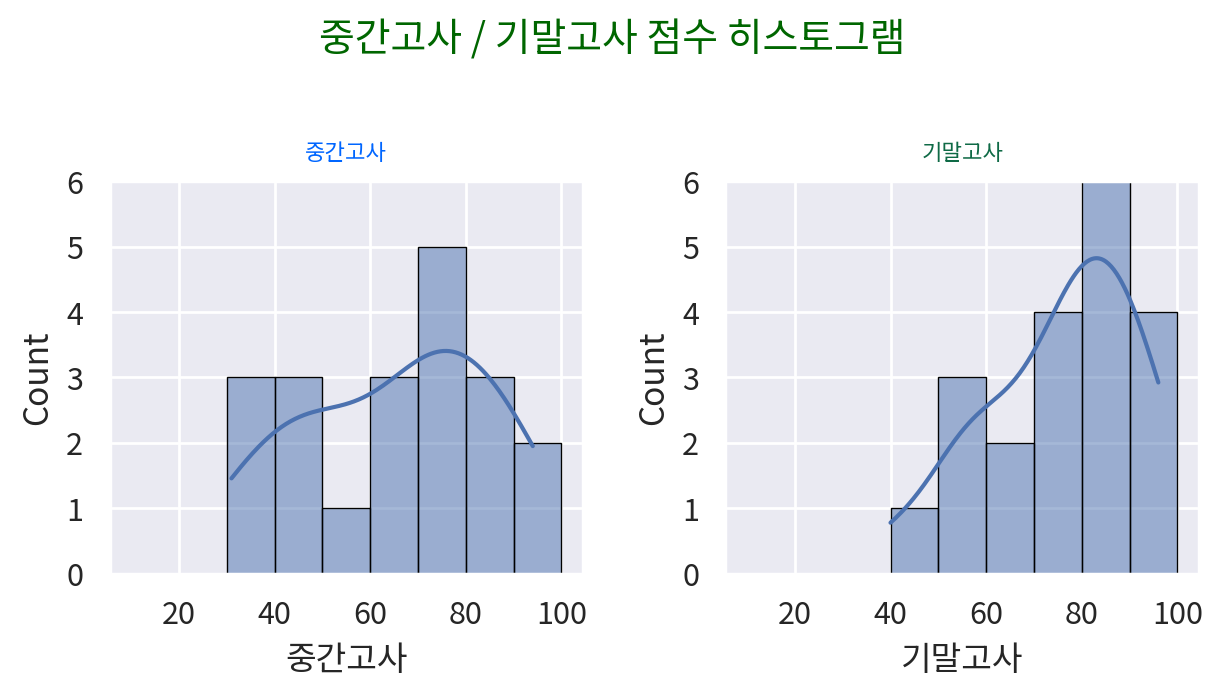

In [22]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.histplot(
    data=stat_comp_grade_copy, x="중간고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[0],bins=[10,20,30,40,50,60,70,80,90,100]
)

sb.histplot(
    data=stat_comp_grade_copy, x="기말고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[1], bins=[10,20,30,40,50,60,70,80,90,100]
)

# 3) 그래프 꾸미기

#그래프 전체에 대한 제목
fig.suptitle('중간고사 / 기말고사 점수 히스토그램',fontsize = 14 , color ='#006600')

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)

# 첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0].set_title("중간고사", color="#0066ff", fontsize=8, pad=8)

# 두 번째 영역 그래프의 축 설정 및 x, y축 라벨 지정, 격자
ax[1].set_title("기말고사", color="#0f6a46", fontsize=8, pad=8)

ax[0].grid()
ax[1].grid()

ax[0].set_ylim(0, 6)  
ax[1].set_ylim(0, 6)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 시험 별 히스토그램을 기반으로 알 수 있는 점
- 기말고사의 경우, 고득점수가 많아 우측에서 높은 봉우리가 확인되었다.
- 중간고사의 경우 70-80점의 학생수가 많기는 하지만 전반적으로 완만한 형태의 분포가 확인되었다

#### 5-4. 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

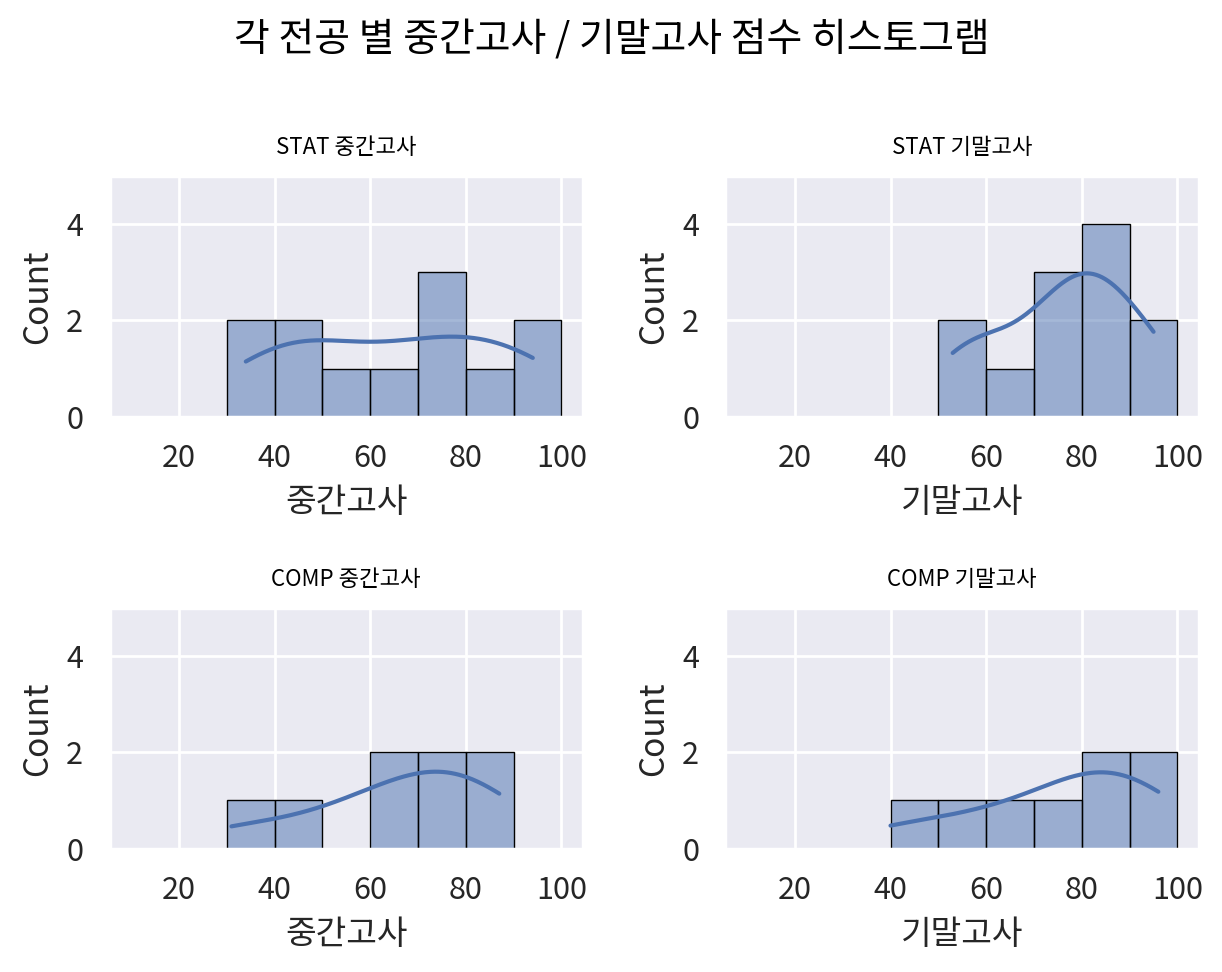

In [23]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px =1000             # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.histplot(
    data=stat_comp_grade_copy.query("전공=='STAT'"), x="중간고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[0][0],bins=[10,20,30,40,50,60,70,80,90,100]
)

sb.histplot(
    data=stat_comp_grade_copy.query("전공=='STAT'"), x="기말고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[0][1],bins=[10,20,30,40,50,60,70,80,90,100]
)

sb.histplot(
    data=stat_comp_grade_copy.query("전공=='COMP'"), x="중간고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[1][0],bins=[10,20,30,40,50,60,70,80,90,100]
)

sb.histplot(
    data=stat_comp_grade_copy.query("전공=='COMP'"), x="기말고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[1][1],bins=[10,20,30,40,50,60,70,80,90,100]
)

# 3) 그래프 꾸미기

#그래프 전체에 대한 제목
fig.suptitle('각 전공 별 중간고사 / 기말고사 점수 히스토그램',fontsize = 14 , color ="#000000")

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)

# 첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("STAT 중간고사", color="#000000", fontsize=8, pad=8)

# 두 번째 영역 그래프의 축 설정 및 x, y축 라벨 지정, 격자
ax[0][1].set_title("STAT 기말고사", color="#000000", fontsize=8, pad=8)

# 세 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[1][0].set_title("COMP 중간고사", color="#000000", fontsize=8, pad=8)

# 네 번째 영역 그래프의 축 설정 및 x, y축 라벨 지정, 격자
ax[1][1].set_title("COMP 기말고사", color="#000000", fontsize=8, pad=8)


ax[0][0].set_ylim(0, 5)  
ax[0][1].set_ylim(0, 5)  
ax[1][0].set_ylim(0, 5)  
ax[1][1].set_ylim(0, 5) 



ax[0][0].grid(True)  
ax[0][1].grid(True)  
ax[1][0].grid(True)  
ax[1][1].grid(True) 



# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 각 전공 별 시험 점수 히스토그램을 기반으로 알 수 있는 점
- 기말고사 전체에 대한 히스토그램 에서는 유독 고득점자가 많아 보였는데, 고득점자는 대부분 STAT 전공에 집중되어 있었다. 

## 02.집단별 요약 | 문제6
senior_lsf 데이터는 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터 일부이다. 복지 시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하고 이 결과로 알 수 있는 객관적 사실을 하나 이상 서술하시오

In [24]:
senior_lsf =load_data('senior_lsf')
senior_lsf.head()

[data] https://data.hossam.kr/data/lab06/senior_lsf.xlsx
[desc] 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터
[!] Cannot read metadata


,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103


In [25]:
senior_lsf_copy = senior_lsf.copy()
senior_lsf_copy_sorted=senior_lsf_copy.sort_values('복지시설',ascending=False).head(10).reset_index(drop=True)
senior_lsf_copy_sorted

,지역명,복지시설
0,Nowon-gu,252
1,Gangseo-gu,215
2,Yeongdeungpo-gu,208
3,Yangcheon-gu,192
4,Guro-gu,192
5,Gangnam-gu,184
6,Songpa-gu,173
7,Mapo-gu,160
8,Seongbuk-gu,158
9,Seongdong-gu,155


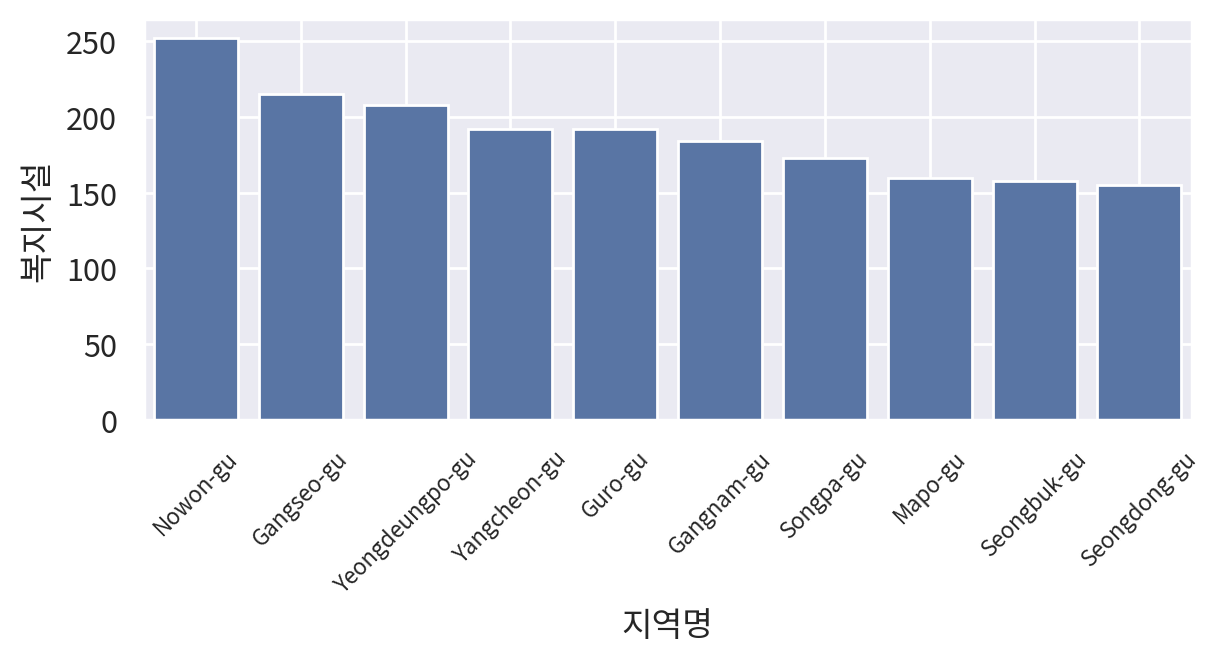

In [26]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=senior_lsf_copy_sorted,          #사용할 데이터 프레임
    x='지역명',          #막대의 카테고리축
    y='복지시설'      #요약할 수치 변수  
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 알 수 있었던 객관적 사실 
- 노원구가 서울시에서 복지시설이 가장 많다 
- 복지시설 수 1위 노원구와 2위 강서구의 격차가 약 40개로 큰 편이다
- 경제력이 좋은 강남구의 복지시설 수는 6위 수준에 머물렀다

## 02.집단별 요약 | 문제7
jobs_by_scale 다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이
다. 종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는
년도로 설정하시오.

In [27]:
senior_lsf =load_data('jobs_by_scale')
senior_lsf

[data] https://data.hossam.kr/data/lab06/jobs_by_scale.xlsx
[desc] 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터 (출처: 국가통계포털)
[!] Cannot read metadata


,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


In [43]:
senior_lsf_melt=senior_lsf.melt(id_vars = '종사자규모별',value_name='업체수',var_name='년도')
senior_lsf_melt

,종사자규모별,년도,업체수
0,1~4명,2015,553.5
1,5~9명,2015,211.6
2,10~29명,2015,194.7
3,30~49명,2015,227.4
4,50~99명,2015,152.8
5,100~199명,2015,221.9
6,200~299명,2015,80.9
7,300~999명,2015,100.5
8,1000명 이상,2015,557.6
9,1~4명,2016,576.7


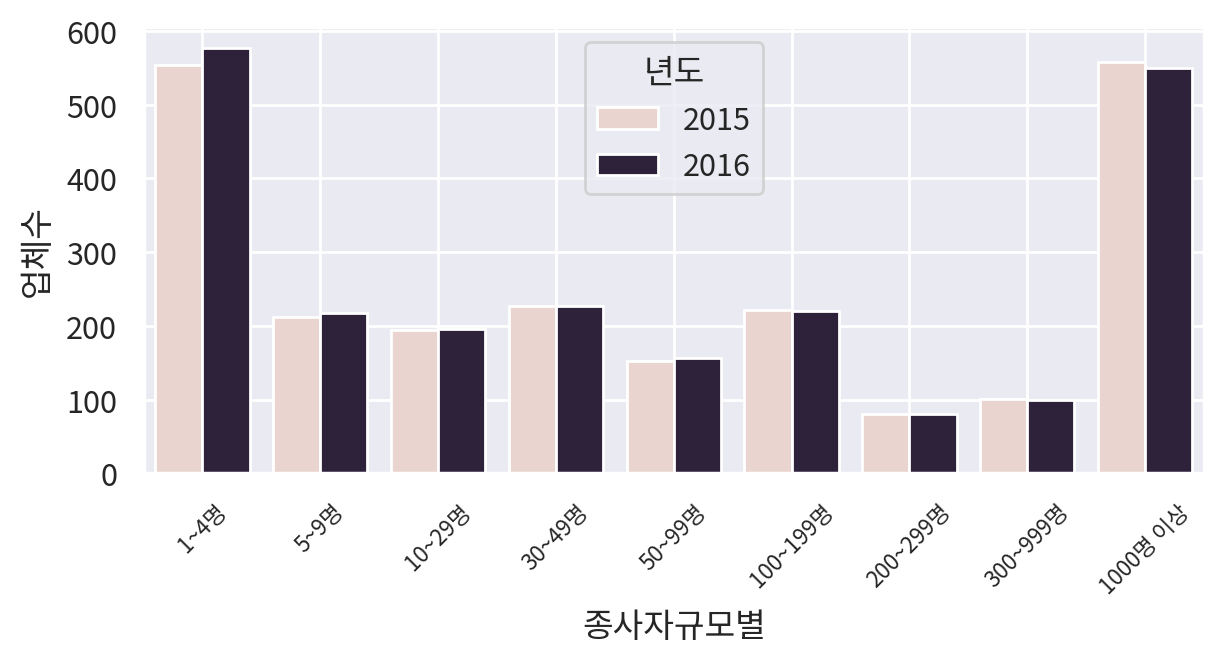

In [44]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=senior_lsf_melt,          #사용할 데이터 프레임
    x='종사자규모별',          #막대의 카테고리축
    y='업체수',                 #요약할 수치 변수  
    hue='년도',            #그룹 구분
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


## 03. 서브플롯

covid19_full 데이터는 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 기록한 데이터이다.
아래의 내용을 모두 반영한 그래프를 생성하세요.

- 데이터 프레임을 생성하는 과정에서 인덱스를 지정하지 마세요.

- 사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.
 
- 2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성하시오.
첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

- 두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

- 누적 확진자는 y축을 왼쪽으로 설정한 막대 그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성해야 합니다.

아래의 예시와 최대한 비슷하게 구현하면 됩니다

In [55]:
covid19_full = load_data('covid19_full')

covid19_full_copy= covid19_full.copy()

covid19_full_copy


[data] https://data.hossam.kr/data/lab06/covid19_full.xlsx
[desc] 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 일단위로 기록한 실제 데이터 (자체수집)
[!] Cannot read metadata


,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [63]:
date_list = covid19_full_copy['날짜'].values

date_list

array(['2023-05-31', '2023-05-30', '2023-05-29', ..., '2020-02-07',
       '2020-02-06', '2020-02-05'], shape=(1212,), dtype=object)

In [ ]:


dt.datetime.strptime(covid19_full_copy['날짜'][0],'%Y-%m-%d')

## 04.ADSP 기출 데이터셋 활용 
mpg 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다



In [103]:
mpg = load_data('mpg')
mpg

[data] https://data.hossam.kr/data/lab06/mpg.xlsx
[desc] 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터 (출처: ADsP 기출 / R 내장 데이터)

field         description
------------  ----------------------------------------------------
manufacturer  자동차 제조사
model         자동차 모델명
displ         자동차 배기량
year          제조년도
cyl           엔진 실린더 수
trans         자동차 트랜스미션 종류
drv           자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동
cty           도심 연비 (마일/갤론)
hwy           고속도로 연비 (마일/갤론)
fl            연료 종류
class         자동차 분류



,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 4 ADsP 기출 데이터셋 활용 |  문제 1
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오

In [92]:
a=DataFrame(mpg.groupby('manufacturer')['id'].count())
a_sorted = a.sort_values('id',ascending=False)
a_sorted = a_sorted.rename(columns={'id': 'number of cars'})
a_sorted

,number of cars
manufacturer,
dodge,37
toyota,34
volkswagen,27
ford,25
chevrolet,19
audi,18
hyundai,14
subaru,14
nissan,13


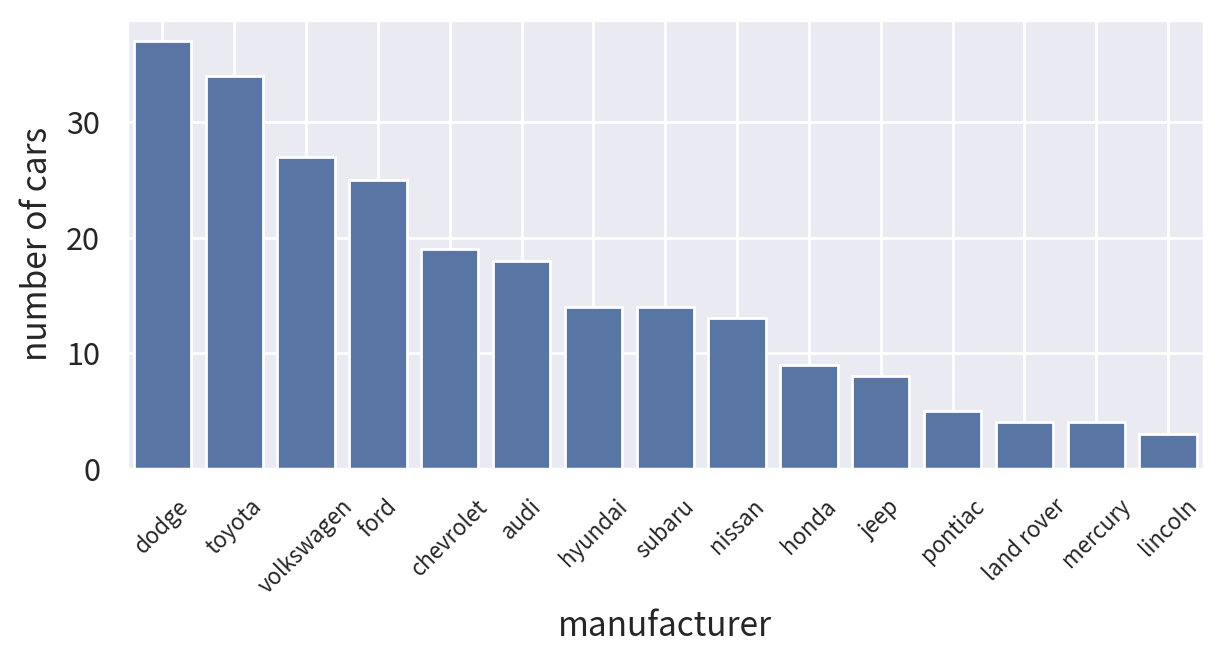

In [93]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=a_sorted,          #사용할 데이터 프레임
    x='manufacturer',          #막대의 카테고리축
    y='number of cars',      #요약할 수치 변수  

)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4 ADsP 기출 데이터셋 활용 | 문제 2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오

In [110]:
filtered = mpg.filter(['id','manufacturer','year'])

a=DataFrame(filtered.groupby(['manufacturer','year'])['id'].count())
a_sorted = a.sort_values('id',ascending=False)
a_sorted = a_sorted.rename(columns={'id': 'number of cars'})

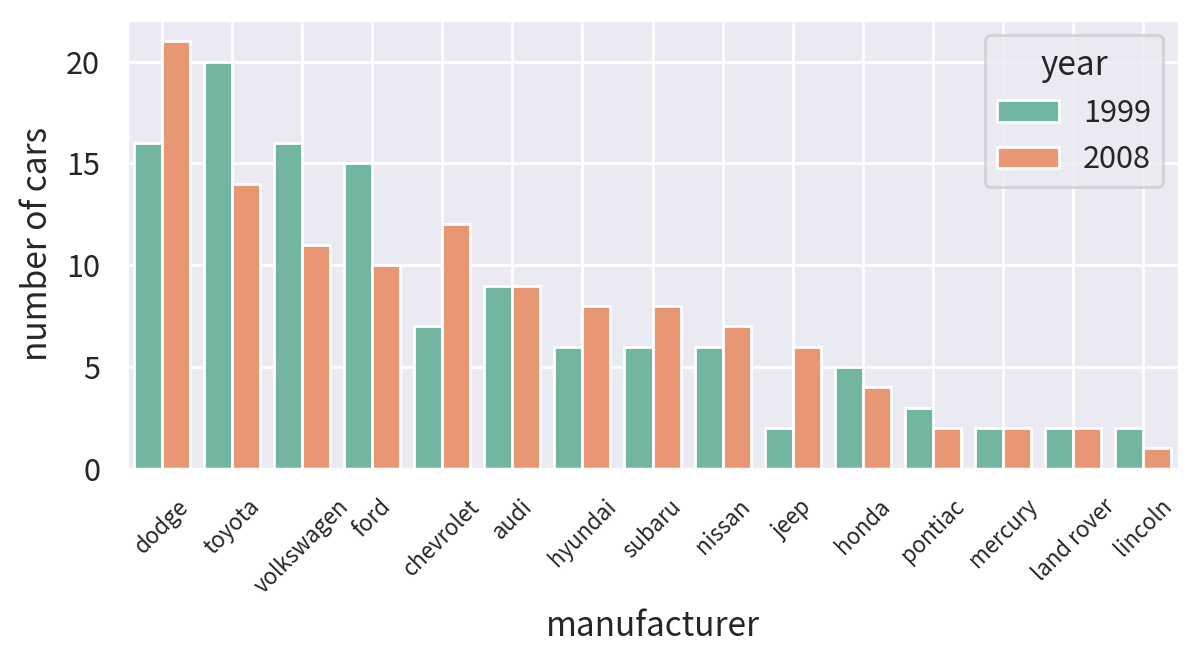

In [112]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=a_sorted,           #사용할 데이터 프레임
    x='manufacturer',        #막대의 카테고리축
    y='number of cars',      #요약할 수치 변수  
    hue = 'year',
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4 ADsP 기출 데이터셋 활용 | 문제 3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

In [138]:
mpg

categorized= mpg['trans_type'] = np.where(mpg['trans'].str.contains('auto'), 'auto', 'manual')
a= DataFrame (categorized,columns=['trans_type'])
a.reset_index()


,index,trans_type
0,0,auto
1,1,manual
2,2,manual
3,3,auto
4,4,auto
...,...,...
229,229,auto
230,230,manual
231,231,auto
232,232,manual


In [144]:
result=DataFrame(a['trans_type'].value_counts())
result

,count
trans_type,
auto,157
manual,77


C:\Users\itwill\AppData\Local\Temp\ipykernel_8216\307417249.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


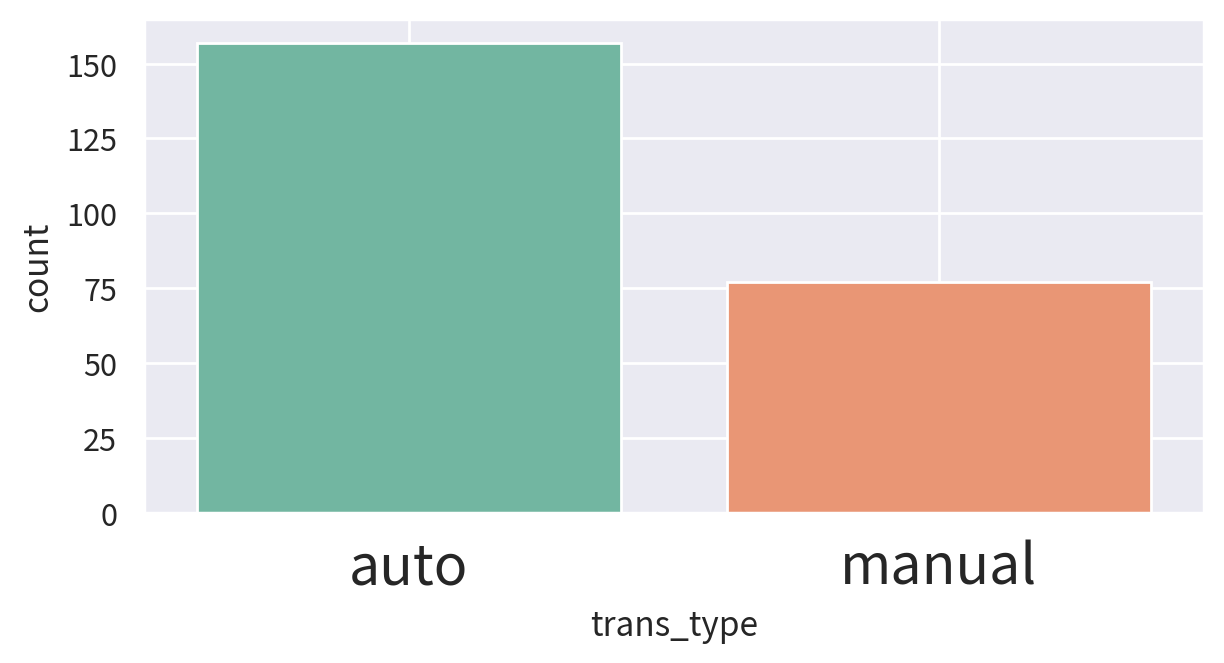

In [147]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=result,           #사용할 데이터 프레임
    x=result.index,        #막대의 카테고리축
    y='count',      #요약할 수치 변수  
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=20)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4 ADsP 기출 데이터셋 활용 | 문제 4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

In [168]:
a=mpg.filter(['id','trans','cty'])
a_sorted= DataFrame(a.sort_values('cty',ascending=False))
a_sorted

,id,trans,cty
221,222,manual(m5),35
212,213,manual(m5),33
222,223,auto(l4),29
196,197,manual(m5),28
99,100,manual(m5),28
...,...,...,...
69,70,manual(m6),9
54,55,auto(l5),9
59,60,auto(l5),9
65,66,auto(l5),9


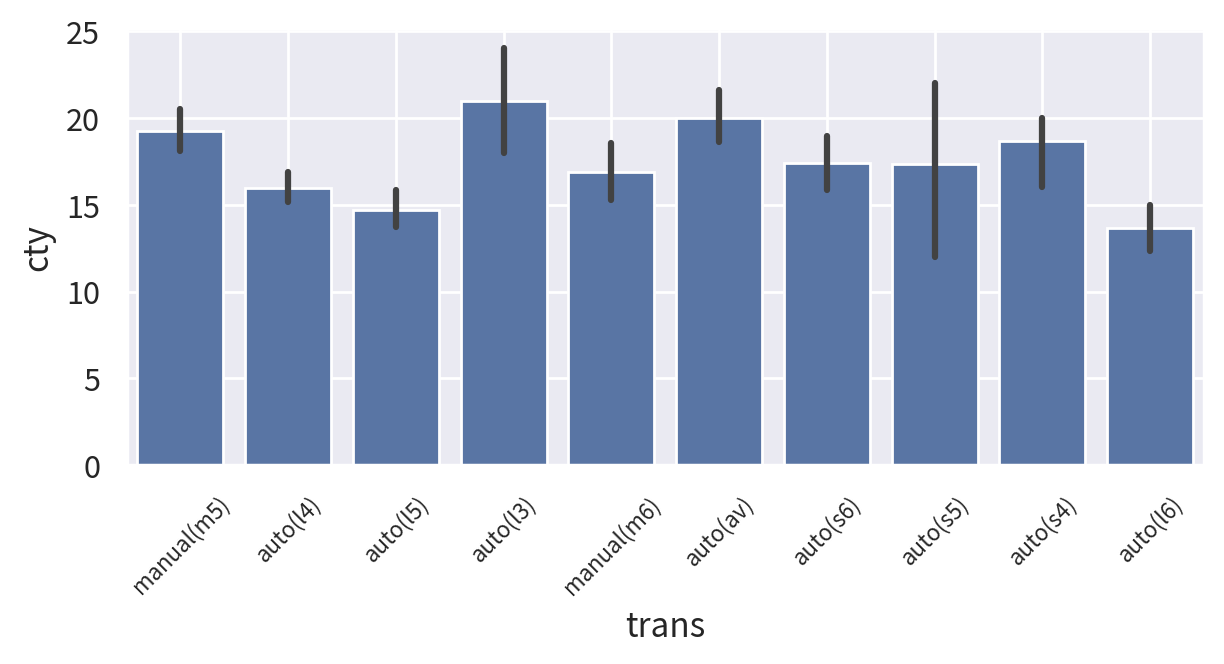

In [169]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=a_sorted,          #사용할 데이터 프레임
    x='trans',          #막대의 카테고리축
    y='cty',      #요약할 수치 변수  
    estimator = np.mean,
    #errorbar=('ci',95),   #ci 는 신뢰수준
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4 ADsP 기출 데이터셋 활용 | 문제 5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

In [171]:
mpg

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_type
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual
